In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [79]:
miss_val=["NaN","n/a","na","N/A","NA","Na","nan"]

In [80]:
X_train=pd.read_csv(r'C:\Users\SMART\Downloads\train_loan.csv',na_values=miss_val)
X_test=pd.read_csv(r'C:\Users\SMART\Downloads\test_loan.csv',na_values=miss_val)

In [81]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [83]:
print(X_train.columns)
print(X_test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Train set

### Missing value handling 

In [85]:
X_train.shape

(614, 13)

In [86]:
X_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Catogorical columns 

In [87]:
X_train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [88]:
X_train.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [89]:
X_train.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [90]:
for col in ["Gender","Married","Self_Employed","Dependents"]:
    print(X_train[col].mode())    

0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    No
Name: Self_Employed, dtype: object
0    0
Name: Dependents, dtype: object


In [91]:
X_train["Gender"]=X_train["Gender"].fillna("Male")
X_train["Married"]=X_train["Married"].fillna("Yes")
X_train["Self_Employed"]=X_train["Self_Employed"].fillna("No")
X_train["Dependents"]=X_train["Dependents"].fillna("0")

### Numerical Columns

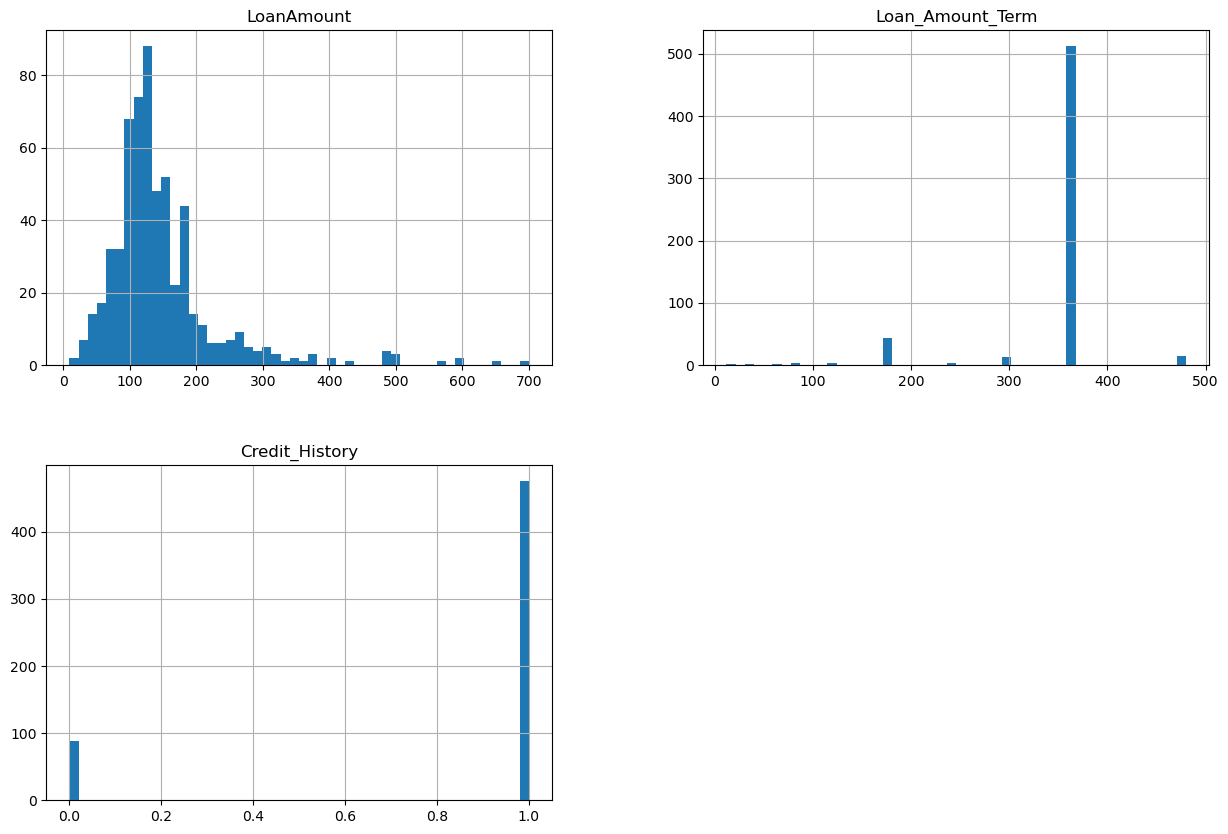

In [92]:
X_train[["LoanAmount","Loan_Amount_Term","Credit_History"]].hist(figsize=(15,10),bins=50);

In [93]:
X_train["LoanAmount"].median()

128.0

In [94]:
X_train["LoanAmount"]=X_train["LoanAmount"].fillna(128)

In [95]:
X_train["Credit_History"]=X_train["Credit_History"].fillna(1)

In [96]:
X_train["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [97]:
X_train[["Loan_Amount_Term","LoanAmount"]].corr()

,Loan_Amount_Term,LoanAmount
Loan_Amount_Term,1.000000,0.039358
LoanAmount,0.039358,1.000000


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

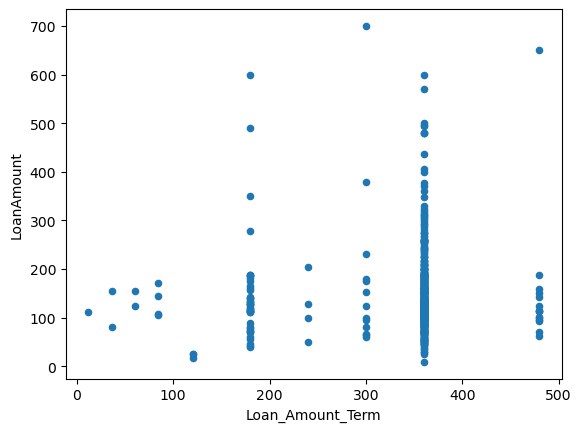

In [98]:
X_train.plot.scatter("Loan_Amount_Term", "LoanAmount", s=None, c=None)

In [99]:
X_train["Loan_Amount_Term"].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [100]:
X_train["Loan_Amount_Term"]=X_train["Loan_Amount_Term"].fillna(360.0)

In [101]:
X_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier detection

In [102]:
X_train["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [103]:
X_train["Dependents"]=X_train["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

In [104]:
X_train["Dependents"].unique()

array([0, 1, 2, 3], dtype=int64)

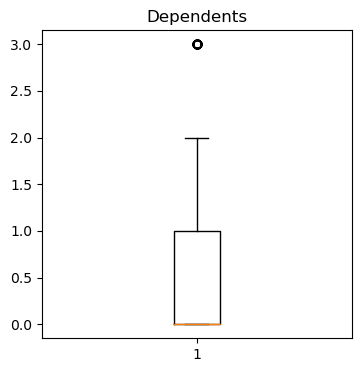

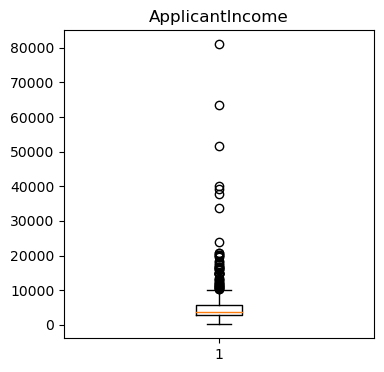

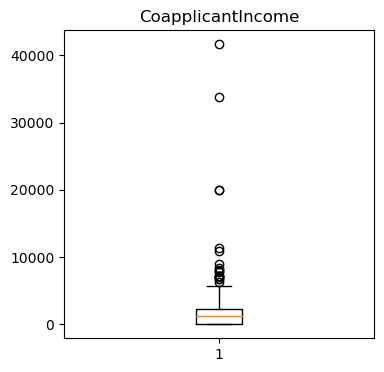

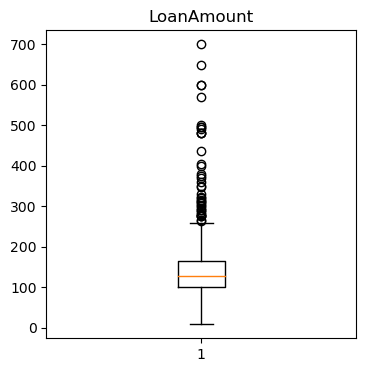

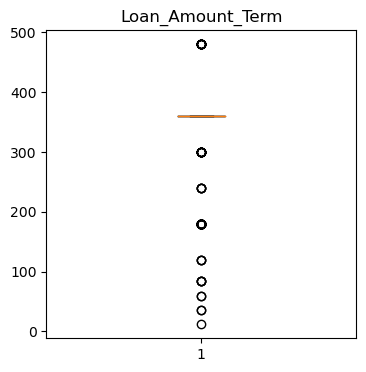

In [105]:
for col in ["Dependents",'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']:
    plt.figure(figsize=(4,4))
    plt.boxplot(X_train[col])
    plt.title(col)
    plt.show()

In [106]:
def limits(data,col):
    Q1=data[col].quantile(.25)
    Q3=data[col].quantile(.75)
    IQR=Q3-Q1
    low_bound=Q1-IQR*1.5
    up_bound=Q3+IQR*1.5
    return low_bound,up_bound

In [107]:
low_ApplicantIncome,up_ApplicantIncome=limits(X_train,"ApplicantIncome")
filtered_rows = X_train[(X_train["ApplicantIncome"] < low_ApplicantIncome) | (X_train["ApplicantIncome"] > up_ApplicantIncome)]

In [108]:
filtered_rows.shape

(50, 13)

In [109]:
for x in X_train["ApplicantIncome"]:
    if x < low_ApplicantIncome:
        X_train["ApplicantIncome"].replace(x,low_ApplicantIncome)
    if x > up_ApplicantIncome:
        X_train["ApplicantIncome"].replace(x,up_ApplicantIncome)

In [110]:
low_CoapplicantIncome,up_CoapplicantIncome=limits(X_train,"CoapplicantIncome")
filtered_rows_co = X_train[(X_train["CoapplicantIncome"] < low_CoapplicantIncome) | (X_train["CoapplicantIncome"] > up_CoapplicantIncome)]

In [111]:
filtered_rows_co.shape

(18, 13)

In [112]:
for x in X_train["CoapplicantIncome"]:
    if x < low_CoapplicantIncome:
        X_train["CoapplicantIncome"].replace(x,low_CoapplicantIncome)
    if x > up_CoapplicantIncome:
        X_train["CoapplicantIncome"].replace(x,up_CoapplicantIncome)

### Encoding

In [113]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
X_train=pd.get_dummies(X_train,columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [115]:
X_train["Loan_Status"]=X_train["Loan_Status"].map({'Y':1,'N':0})

In [116]:
X_train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


### Scaling

In [117]:
def MinMax(data,col):
    data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

In [118]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    MinMax(X_train,col)

In [119]:
X_train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,0.054830,0.036192,0.172214,0.74359,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,0.035250,0.000000,0.082489,0.74359,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,0.072356,0.000000,0.191027,0.74359,1.0,1,0,1,1,0,1,0,1,0,0,0,1


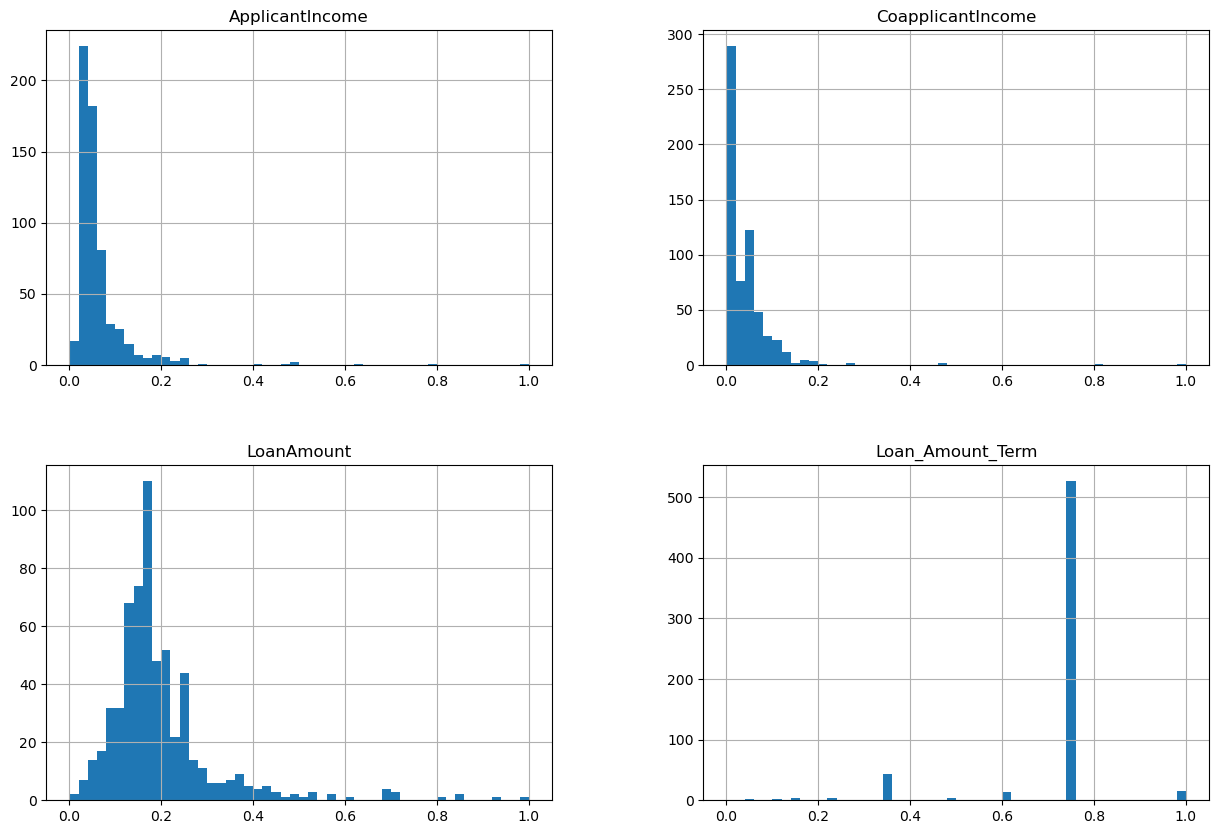

In [120]:
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].hist(figsize=(15,10),bins=50);

# Test Data

## Missing value handling

In [121]:
X_test.shape

(367, 12)

In [122]:
X_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [123]:
for col in ["Gender","Credit_History","Self_Employed","Dependents"]:
    print(X_test[col].mode())

0    Male
Name: Gender, dtype: object
0    1.0
Name: Credit_History, dtype: float64
0    No
Name: Self_Employed, dtype: object
0    0
Name: Dependents, dtype: object


In [124]:
X_test["Gender"]=X_test["Gender"].fillna("Male")
X_test["Credit_History"]=X_test["Credit_History"].fillna(1)
X_test["Self_Employed"]=X_test["Self_Employed"].fillna("No")
X_test["Dependents"]=X_test["Dependents"].fillna("0")

In [125]:
X_test["LoanAmount"].median()

125.0

In [126]:
X_test["LoanAmount"]=X_test["LoanAmount"].fillna(125.0)

In [127]:
X_test["Loan_Amount_Term"].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [128]:
X_test["Loan_Amount_Term"]=X_test["Loan_Amount_Term"].fillna(360.0)

### Outlier detection

In [129]:
X_test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [130]:
X_test["Dependents"]=X_test["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

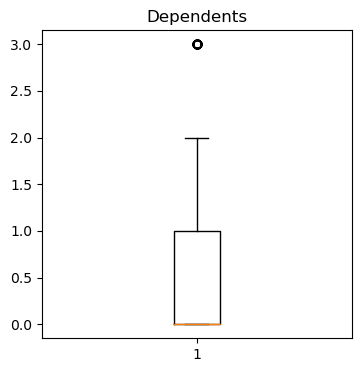

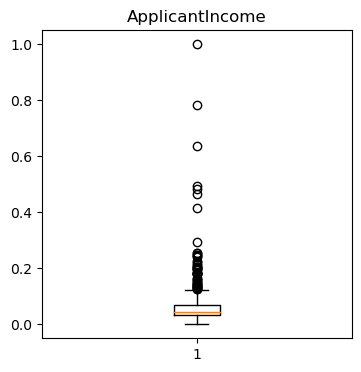

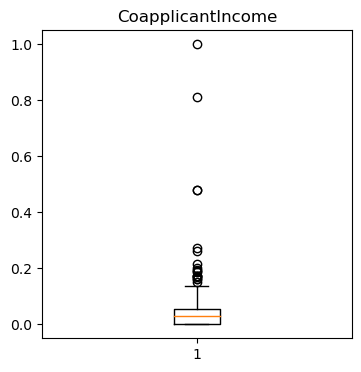

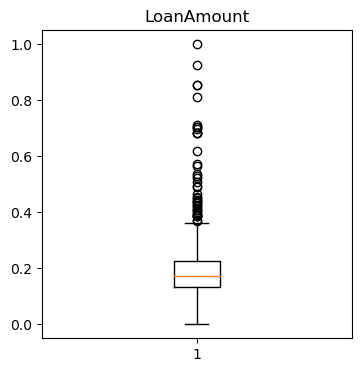

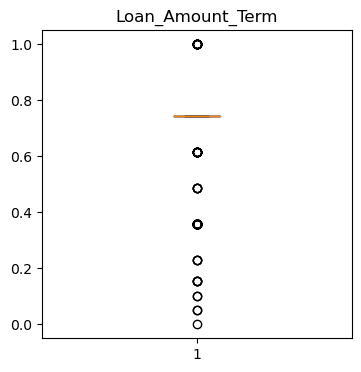

In [131]:
for col in ["Dependents",'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']:
    plt.figure(figsize=(4,4))
    plt.boxplot(X_train[col])
    plt.title(col)
    plt.show()

In [132]:
low_ApplicantIncome_test,up_ApplicantIncome_test=limits(X_test,"ApplicantIncome")
filtered_rows_appli_test = X_test[(X_test["ApplicantIncome"] < low_ApplicantIncome_test) | (X_test["ApplicantIncome"] > up_ApplicantIncome_test)]

In [133]:
filtered_rows_appli_test.shape

(32, 12)

In [134]:
for x in X_test["ApplicantIncome"]:
    if x < low_ApplicantIncome_test:
        X_test["ApplicantIncome"].replace(x,low_ApplicantIncome_test)
    if x > up_ApplicantIncome:
        X_test["ApplicantIncome"].replace(x,up_ApplicantIncome_test)

In [135]:
low_CoapplicantIncome_test,up_CoapplicantIncome_test=limits(X_test,"CoapplicantIncome")
filtered_rows_co_test = X_test[(X_test["CoapplicantIncome"] < low_CoapplicantIncome_test) | (X_test["CoapplicantIncome"] > up_CoapplicantIncome_test)]

In [136]:
filtered_rows_co_test.shape

(8, 12)

In [137]:
for x in X_test["CoapplicantIncome"]:
    if x < low_CoapplicantIncome_test:
        X_test["CoapplicantIncome"].replace(x,low_CoapplicantIncome_test)
    if x > up_CoapplicantIncome_test:
        X_test["CoapplicantIncome"].replace(x,up_CoapplicantIncome_test)

### Encoding

In [138]:
X_test=pd.get_dummies(X_test,columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [139]:
X_test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
1,LP001022,1,3076,1500,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
2,LP001031,2,5000,1800,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
3,LP001035,2,2340,2546,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
4,LP001051,0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1


### Scaling

In [140]:
# trying another scaling even the train data is scaled by diffrent method.

In [141]:
def StadScaler(data,col):
    data[col]=(data[col]-data[col].mean())/data[col].std()

In [142]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    StadScaler(X_test,col)

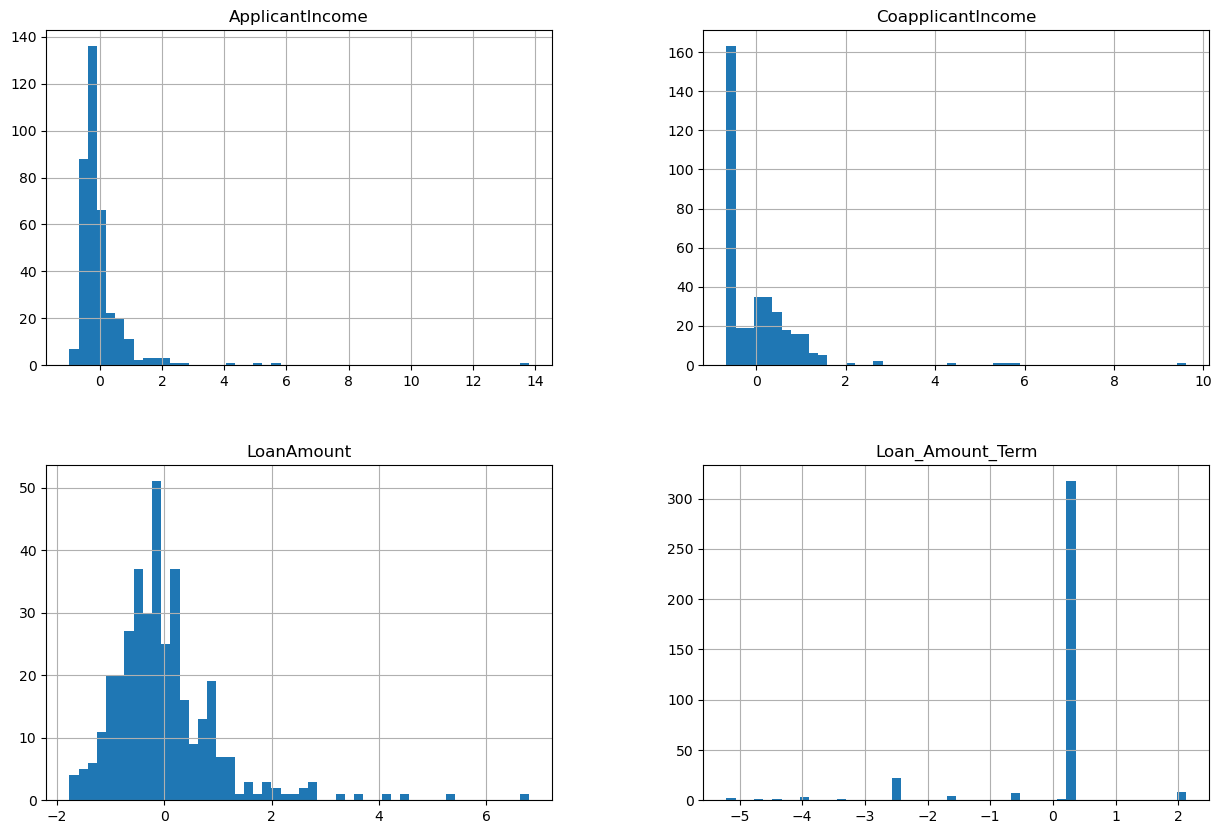

In [143]:
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].hist(figsize=(15,10),bins=50);